In [1]:
import pandas as pd

In [2]:
income=pd.read_csv('income.csv')
income.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
high_income       object
dtype: object

In [15]:
#stripping the inital space in sex column
income['sex']=income['sex'].str.strip()

In [16]:
male_count=income[income['sex']=='Male'].shape[0]
print('male count is',male_count)
female_count=income[income['sex']=='Female'].shape[0]
print('female count is',female_count)
total_count=income.shape[0]
print('total_count is',total_count)

('male count is', 21790)
('female count is', 10771)
('total_count is', 32561)


In [18]:
import numpy as np
income.pivot_table(index='sex',values='hours_per_week',aggfunc=np.sum)

sex
Female    392176
Male      924508
Name: hours_per_week, dtype: int64

In [21]:
#Proportinal difference
#Expected count is 50% each for male and female , so total_count/2 =16280.5
expected_count=16280.5 
male_diff=(float(male_count)-float(expected_count))/float(expected_count)
print(male_diff)
female_diff=float(female_count-expected_count)/float(expected_count)
print(female_diff)

0.338410982464
-0.338410982464


we got -0.338 for the Female difference, and 0.338 for the Male difference. These are great for finding individual differences for each category, but since both values add up to 0, they don't give us a meaningful measure of how our overall observed counts deviate from the expected counts.
What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:
Squaring the difference will ensure that all the differences don't sum to zero (you can't have negative squares), giving us a non-zero number we can use to assess statistical significance.

We can calculate
, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [24]:
male_diff=float(male_count-expected_count)**2/float(expected_count)
print(male_diff)
female_diff=float(female_count-expected_count)**2/float(expected_count)
print(female_diff)
gender_chisq=male_diff+female_diff
print(gender_chisq)

1864.47530788
1864.47530788
3728.95061577


Generating a distribution

Now that we have a chi-squared value for our observed and expected gender counts, we need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. If you recall, we covered statistical significance and p-values in the last mission. A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution.

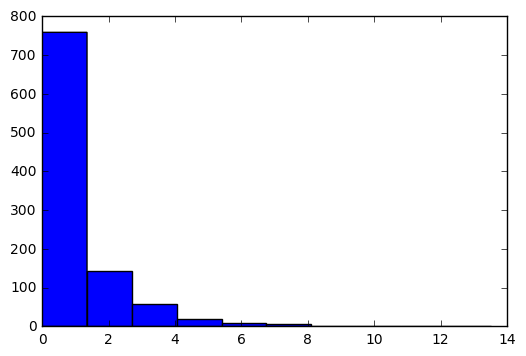

In [29]:
chi_squared_values = []
from numpy.random import random
import matplotlib.pyplot as plt

for i in range(1000):
    sequence = random((32561,))#function to get a vector with 32561 elements
    #print(sequence)
    #For each of the numbers, if it is less than .5, replace it with 0, otherwise replace it with 1
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    #print(sequence)
    #Count up how many times 0 occurs (Male frequency), and how many times 1 occurs (Female frequency).
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)
plt.hist(chi_squared_values)
plt.show()
    

A degree of freedom is the number of values that can vary without the other values being "locked in". In the case of our two categories, there is actually only one degree of freedom. Degrees of freedom are an important statistical concept that will come up repeatedly, both in this mission and after.

In [31]:
from scipy.stats import chisquare
import numpy as np
observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, race_pvalue = chisquare(observed, expected)
print(chisquare_value)
print(race_pvalue)

1080.48593659
1.28484946749e-232
